In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load dataset
pd.set_option("display.max_columns", None)
matches = pd.read_csv("matches.csv")
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [3]:
delivery = pd.read_csv("deliveries.csv")
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [4]:
matches.shape

(1095, 20)

In [5]:
delivery.shape

(260920, 17)

In [6]:
# Lets see total runs in each inning

total_score_df = delivery.groupby(["match_id", "inning"]).sum()['total_runs'].reset_index()
total_score_df

,match_id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
2212,1426310,2,174
2213,1426311,1,175
2214,1426311,2,139
2215,1426312,1,113


In [7]:
# Now, we will consider only the first inning of each match.
total_score_df = total_score_df[total_score_df['inning'] == 1]
total_score_df

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2207,1426307,1,214
2209,1426309,1,159
2211,1426310,1,172
2213,1426311,1,175


In [8]:
# now we will merge match and total score df dataframes
# We will merge on match id. INNING is anyhow 1 so we will not consider this column 
match_df = matches.merge(total_score_df[['match_id','total_runs']], left_on = 'id', right_on= 'match_id')
match_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110


In [9]:
match_df.shape

(1095, 22)

In [10]:
# NOW lets how many teams are there
match_df.team1.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [11]:
# We can see there are some teams like 'Rising Pune Supergiant', 'Gujarat Lions' who are not playing ipl 

teams = [
    'Royal Challengers Bengaluru',
    'Mumbai Indians',
    'Kolkata Knight Riders',
    'Rajasthan Royals',
    'Chennai Super Kings',
    'Sunrisers Hyderabad',
    'Delhi Capitals', 
    'Punjab Kings','Lucknow Super Giants', 'Gujarat Titans']

In [12]:
# 'Sunrisers Hyderabad' and 'Deccan Chargers' both are same teams

match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team2'] = match_df['team2'].str.replace('Kings XI Punjab','Punjab Kings')

match_df['team2'] = match_df['team2'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
match_df['team2'] = match_df['team2'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')

In [15]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [16]:
match_df.shape

(853, 22)

In [20]:
match_df['team1'].unique()

array(['Punjab Kings', 'Delhi Capitals', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Sunrisers Hyderabad',
       'Chennai Super Kings', 'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [21]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
5,335987,2007/08,Jaipur,2008-04-21,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Punjab Kings,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,167.0,20.0,N,NaN,Aleem Dar,RB Tiffin,335987,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [31]:
# Duckworth-Lewis-Stern (DLS) method
match_df['method'].value_counts()

method
D/L    15
Name: count, dtype: int64

In [34]:
# DLS-affected matches

match_df[match_df['method'] == 'D/L']

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
38,336022,2007/08,Delhi,2008-05-17,League,DPMD Jayawardene,Feroz Shah Kotla,Delhi Capitals,Punjab Kings,Delhi Daredevils,bat,Kings XI Punjab,runs,6.0,89.0,8.0,N,D/L,AV Jayaprakash,RE Koertzen,336022,118
41,336025,2007/08,Kolkata,2008-05-18,League,M Ntini,Eden Gardens,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,runs,3.0,53.0,8.0,N,D/L,Asad Rauf,K Hariharan,336025,149
60,392183,2009,Cape Town,2009-04-19,League,DL Vettori,Newlands,Delhi Capitals,Punjab Kings,Delhi Daredevils,field,Delhi Daredevils,wickets,10.0,54.0,6.0,N,D/L,MR Benson,SD Ranade,392183,104
63,392186,2009,Durban,2009-04-21,League,CH Gayle,Kingsmead,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,runs,11.0,69.0,9.2,N,D/L,DJ Harper,SD Ranade,392186,158
89,392214,2009,Centurion,2009-05-07,League,ML Hayden,SuperSport Park,Chennai Super Kings,Punjab Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,12.0,187.0,18.0,N,D/L,DJ Harper,TH Wijewardene,392214,185
221,501245,2011,Kolkata,2011-05-07,League,Iqbal Abdulla,Eden Gardens,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Kolkata Knight Riders,runs,10.0,52.0,10.0,N,D/L,Asad Rauf,PR Reiffel,501245,114
429,733993,2014,Delhi,2014-05-10,League,DW Steyn,Feroz Shah Kotla,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,8.0,43.0,5.0,N,D/L,RM Deshpande,BNJ Oxenford,733993,143
476,829743,2015,Visakhapatnam,2015-04-22,League,DA Warner,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,Sunrisers Hyderabad,runs,16.0,118.0,12.0,N,D/L,RK Illingworth,VA Kulkarni,829743,176
508,829807,2015,Hyderabad,2015-05-15,League,V Kohli,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bengaluru,Sunrisers Hyderabad,bat,Royal Challengers Bangalore,wickets,6.0,81.0,6.0,N,D/L,AK Chaudhary,HDPK Dharmasena,829807,135
633,1082648,2017,Bangalore,2017-05-17,Eliminator,NM Coulter-Nile,M Chinnaswamy Stadium,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,7.0,48.0,6.0,N,D/L,AK Chaudhary,Nitin Menon,1082648,128


In [37]:
# Lets consider matches where (DLS) method was not applied

match_df = match_df[match_df['method'] != 'D/L']
match_df['method'].value_counts()

Series([], Name: count, dtype: int64)

In [39]:
match_df.shape

(838, 22)

In [41]:
# extracting features from match dataset
match_df = match_df[['match_id','city','winner','total_runs']]
match_df.head()

,match_id,city,winner,total_runs
1,335983,Chandigarh,Chennai Super Kings,240
2,335984,Delhi,Delhi Daredevils,129
3,335985,Mumbai,Royal Challengers Bangalore,165
4,335986,Kolkata,Kolkata Knight Riders,110
5,335987,Jaipur,Rajasthan Royals,166


In [43]:
# merging

delivery_df = match_df.merge(delivery, on = 'match_id')
delivery_df.head(3)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335983,Chandigarh,Chennai Super Kings,240,1,Chennai Super Kings,Kings XI Punjab,0,1,PA Patel,B Lee,ML Hayden,0,0,0,NaN,0,NaN,NaN,NaN
1,335983,Chandigarh,Chennai Super Kings,240,1,Chennai Super Kings,Kings XI Punjab,0,2,PA Patel,B Lee,ML Hayden,0,0,0,NaN,0,NaN,NaN,NaN
2,335983,Chandigarh,Chennai Super Kings,240,1,Chennai Super Kings,Kings XI Punjab,0,3,PA Patel,B Lee,ML Hayden,1,0,1,NaN,0,NaN,NaN,NaN


In [45]:
# Now, let's consider only the second inning of each match.
delivery_df = delivery_df[delivery_df['inning'] == 2]
delivery_df.head(3)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,1,K Goel,JDP Oram,JR Hopes,4,0,4,NaN,0,NaN,NaN,NaN
125,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,2,K Goel,JDP Oram,JR Hopes,0,0,0,NaN,0,NaN,NaN,NaN
126,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,3,K Goel,JDP Oram,JR Hopes,0,0,0,NaN,0,NaN,NaN,NaN


In [47]:
delivery_df.shape

(97600, 20)

In [49]:
# Lets now get current runs 

delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
124,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,1,K Goel,JDP Oram,JR Hopes,4,0,4,NaN,0,NaN,NaN,NaN,4
125,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,2,K Goel,JDP Oram,JR Hopes,0,0,0,NaN,0,NaN,NaN,NaN,4
126,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,3,K Goel,JDP Oram,JR Hopes,0,0,0,NaN,0,NaN,NaN,NaN,4
127,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,4,K Goel,JDP Oram,JR Hopes,1,0,1,NaN,0,NaN,NaN,NaN,5
128,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,5,JR Hopes,JDP Oram,K Goel,0,0,0,NaN,0,NaN,NaN,NaN,5


In [51]:
# now we will find runs left 
# (total runs x)- (current score) will give runs left 

delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [53]:
# Now lets see how many balls left 

delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,1,K Goel,JDP Oram,JR Hopes,4,0,4,NaN,0,NaN,NaN,NaN,4,236,125
125,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,2,K Goel,JDP Oram,JR Hopes,0,0,0,NaN,0,NaN,NaN,NaN,4,236,124
126,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,3,K Goel,JDP Oram,JR Hopes,0,0,0,NaN,0,NaN,NaN,NaN,4,236,123
127,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,4,K Goel,JDP Oram,JR Hopes,1,0,1,NaN,0,NaN,NaN,NaN,5,235,122
128,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,5,JR Hopes,JDP Oram,K Goel,0,0,0,NaN,0,NaN,NaN,NaN,5,235,121


In [55]:
# now lets see how many wickets are left
# If a player is out, it is recorded next to their name; otherwise, it is marked as NaN.
# We will fill nan with 0

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,1,K Goel,JDP Oram,JR Hopes,4,0,4,NaN,0,0,NaN,NaN,4,236,125
125,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,2,K Goel,JDP Oram,JR Hopes,0,0,0,NaN,0,0,NaN,NaN,4,236,124
126,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,3,K Goel,JDP Oram,JR Hopes,0,0,0,NaN,0,0,NaN,NaN,4,236,123
127,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,4,K Goel,JDP Oram,JR Hopes,1,0,1,NaN,0,0,NaN,NaN,5,235,122
128,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,5,JR Hopes,JDP Oram,K Goel,0,0,0,NaN,0,0,NaN,NaN,5,235,121


In [57]:
# Wherever there is a name, we will replace it with 1.
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: x if x == '0' else "1")

#Here,`x if x == 0` ensures that if the value is 0,it remains unchanged,and it replaces other values (names) with 1

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

In [59]:
# lets count how many wickets have been taken

wickets= delivery_df.groupby("match_id")['player_dismissed'].cumsum()
wickets

124       0
125       0
126       0
127       0
128       0
         ..
201576    2
201577    2
201578    2
201579    2
201580    2
Name: player_dismissed, Length: 97600, dtype: int32

In [61]:
# Lets see how many wickets are left 

delivery_df['wickets_left'] = 10- wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
124,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,1,K Goel,JDP Oram,JR Hopes,4,0,4,NaN,0,0,NaN,NaN,4,236,125,10
125,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,2,K Goel,JDP Oram,JR Hopes,0,0,0,NaN,0,0,NaN,NaN,4,236,124,10
126,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,3,K Goel,JDP Oram,JR Hopes,0,0,0,NaN,0,0,NaN,NaN,4,236,123,10
127,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,4,K Goel,JDP Oram,JR Hopes,1,0,1,NaN,0,0,NaN,NaN,5,235,122,10
128,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,5,JR Hopes,JDP Oram,K Goel,0,0,0,NaN,0,0,NaN,NaN,5,235,121,10


In [63]:
delivery_df.shape

(97600, 24)

In [65]:
# Current run rate (crr)= runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [67]:
# required run rate:(rrr) 
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [69]:
# If winner and batting team are same then result will be 1 esle 0
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [71]:
delivery_df['result'] = delivery_df.apply(result, axis = 1)

In [72]:
delivery_df['result'].value_counts()

result
1    49886
0    47714
Name: count, dtype: int64

In [73]:
# Now lets extract the columns that are required for our predictions
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x',
            'crr','rrr','result']]
final_df = final_df.sample(final_df.shape[0])
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
93904,Sunrisers Hyderabad,Kings XI Punjab,Hyderabad,78,91,10,143,13.448276,5.142857,1
53165,Deccan Chargers,Rajasthan Royals,Hyderabad,57,66,9,126,7.666667,5.181818,1
158414,Royal Challengers Bangalore,Chennai Super Kings,Mumbai,166,86,7,216,8.823529,11.581395,0
139837,Rajasthan Royals,Kolkata Knight Riders,NaN,154,96,5,191,9.250000,9.625000,0
80800,Kings XI Punjab,Rajasthan Royals,Pune,98,72,6,162,8.000000,8.166667,0


In [74]:
final_df.describe()

,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
count,97600.000000,97600.000000,97600.000000,97600.000000,9.757400e+04,97600.000000,97600.000000
mean,93.799068,68.418770,7.488914,169.105584,inf,8.585646,0.511127
std,51.090108,33.458865,2.171846,30.768497,NaN,4.392425,0.499879
min,-6.000000,3.000000,0.000000,67.000000,-1.320000e+02,-9.000000,0.000000
25%,54.000000,40.000000,6.000000,148.000000,7.339806e+00,6.493151,0.000000
50%,93.000000,69.000000,8.000000,168.000000,8.752941e+00,8.147368,1.000000
75%,132.000000,97.000000,9.000000,188.000000,1.044706e+01,9.971831,1.000000
max,286.000000,125.000000,10.000000,287.000000,inf,114.000000,1.000000


In [78]:
final_df['crr'].replace([np.inf, -np.inf], np.nan, inplace=True)

In [81]:
final_df.isnull().sum()

batting_team       0
bowling_team       0
city            4959
runs_left          0
balls_left         0
wickets_left       0
total_runs_x       0
crr              837
rrr                0
result             0
dtype: int64

In [83]:
final_df.dropna(subset = ['crr'], inplace = True)

In [85]:
# In CRR, we have `inf` values. 

final_df = final_df[final_df['balls_left'] !=0]
final_df.describe()

,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
count,96763.000000,96763.000000,96763.000000,96763.000000,96763.000000,96763.000000,96763.000000
mean,93.213532,67.972593,7.468971,169.119767,9.029772,8.590067,0.510960
std,50.834976,33.256062,2.170193,30.760557,7.647954,4.408685,0.499882
min,-6.000000,3.000000,0.000000,67.000000,-132.000000,-9.000000,0.000000
25%,53.000000,40.000000,6.000000,148.000000,7.333333,6.486486,0.000000
50%,92.000000,69.000000,8.000000,168.000000,8.727273,8.148148,1.000000
75%,131.000000,97.000000,9.000000,188.000000,10.390244,9.983607,1.000000
max,286.000000,125.000000,10.000000,287.000000,162.000000,114.000000,1.000000


In [87]:
final_df.isnull().sum()

batting_team       0
bowling_team       0
city            4917
runs_left          0
balls_left         0
wickets_left       0
total_runs_x       0
crr                0
rrr                0
result             0
dtype: int64

In [89]:
# THere are null values so we will drop na values
final_df.dropna(inplace=True)

In [91]:
final_df.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets_left    0
total_runs_x    0
crr             0
rrr             0
result          0
dtype: int64

In [93]:
X = final_df.iloc[:,:-1]
X.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
93904,Sunrisers Hyderabad,Kings XI Punjab,Hyderabad,78,91,10,143,13.448276,5.142857
53165,Deccan Chargers,Rajasthan Royals,Hyderabad,57,66,9,126,7.666667,5.181818
158414,Royal Challengers Bangalore,Chennai Super Kings,Mumbai,166,86,7,216,8.823529,11.581395
80800,Kings XI Punjab,Rajasthan Royals,Pune,98,72,6,162,8.000000,8.166667
112294,Sunrisers Hyderabad,Delhi Daredevils,Delhi,166,107,9,187,9.692308,9.308411


In [95]:
y = final_df['result']

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 40)

In [111]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data
X = final_df.iloc[:, :-1]
y = final_df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=40)

# Create ColumnTransformer
trf = ColumnTransformer([
    ('categorical', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

# Build Pipeline
pipe = Pipeline([
    ('transform', trf),
    ('model', LogisticRegression(solver='liblinear'))
])

# Fit the pipeline
pipe.fit(X_train, y_train)


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('model', LogisticRegression(solver='liblinear'))])

In [171]:
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('categorical', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')


In [113]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ('transform', trf),
    ('model',LogisticRegression(solver = 'liblinear'))
])

In [115]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('model', LogisticRegression(solver='liblinear'))])

In [117]:
# Predicting
y_pred = pipe.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [119]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, y_pred)

0.8216113228089276

In [169]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      8956
           1       0.82      0.84      0.83      9414

    accuracy                           0.82     18370
   macro avg       0.82      0.82      0.82     18370
weighted avg       0.82      0.82      0.82     18370



In [164]:
pipe.predict_proba(X_test)   # probability of winning of each team 

array([[0.01556997, 0.98443003],
       [0.1468421 , 0.8531579 ],
       [0.8693799 , 0.1306201 ],
       ...,
       [0.07182291, 0.92817709],
       [0.22441788, 0.77558212],
       [0.02582468, 0.97417532]])

In [121]:
X_test.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
92329,Mumbai Indians,Kolkata Knight Riders,Kolkata,28,28,7,187,10.369565,6.000000
180029,Sunrisers Hyderabad,Rajasthan Royals,Jaipur,75,40,8,214,10.425000,11.250000
19219,Deccan Chargers,Kings XI Punjab,Johannesburg,129,121,10,134,-30.000000,6.396694
118897,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,143,32,3,231,6.000000,26.812500
80125,Kolkata Knight Riders,Kings XI Punjab,Bangalore,12,16,3,199,10.788462,4.500000


In [123]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [125]:
def match_progression(x_df, match_id, pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]

    if match.empty:
        print(f"No over-end data found for match_id: {match_id}")
        return None, None

    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]

    if temp_df.empty:
        print(f"No valid data left after filtering for match_id: {match_id}")
        return None, None

    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1, temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)

    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)
    wickets.append(0)
    temp_df['wickets_in_over'] = (np.array(new_wickets) - np.array(wickets))[:temp_df.shape[0]]

    print("Target:", target)
    return temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']], target


In [127]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

No over-end data found for match_id: 74


In [129]:
teams

['Royal Challengers Bengaluru',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Chennai Super Kings',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Punjab Kings',
 'Lucknow Super Giants',
 'Gujarat Titans']

In [131]:
final_df['city'].unique()


array(['Hyderabad', 'Mumbai', 'Pune', 'Delhi', 'Jaipur', 'Chandigarh',
       'Bengaluru', 'Chennai', 'Abu Dhabi', 'Ahmedabad', 'Sharjah',
       'Kolkata', 'Durban', 'Centurion', 'Nagpur', 'Visakhapatnam',
       'Dubai', 'Cape Town', 'Dharamsala', 'Cuttack', 'Port Elizabeth',
       'Kimberley', 'Lucknow', 'Indore', 'Mohali', 'Navi Mumbai',
       'Bangalore', 'Bloemfontein', 'Johannesburg', 'Ranchi', 'Guwahati',
       'East London', 'Raipur'], dtype=object)

In [133]:
import pickle

In [135]:
pickle.dump(pipe, open("ipl_win_predictor.pkl", "wb"))

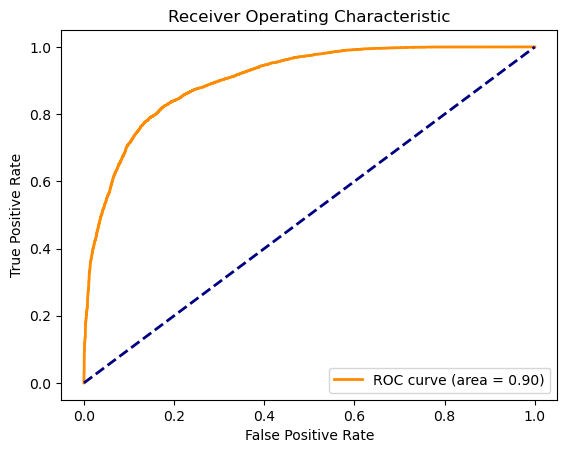

In [137]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probs = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [139]:
model = pickle.load(open('ipl_win_predictor.pkl', 'rb'))
sample_input = X_test.iloc[0:1]
print(model.predict(sample_input))
print(model.predict_proba(sample_input))


[1]
[[0.06954596 0.93045404]]


<Figure size 600x500 with 0 Axes>

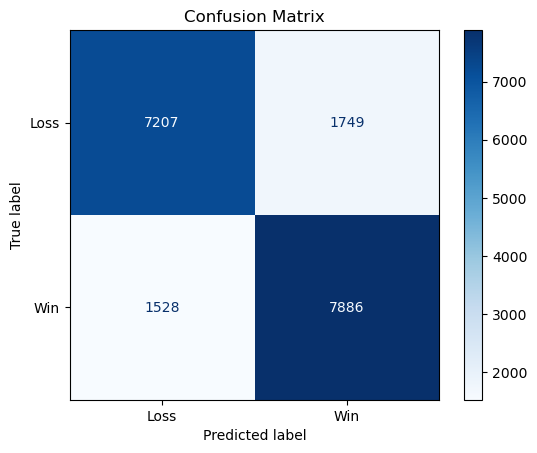

In [141]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = pipe.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Loss', 'Win'])

plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


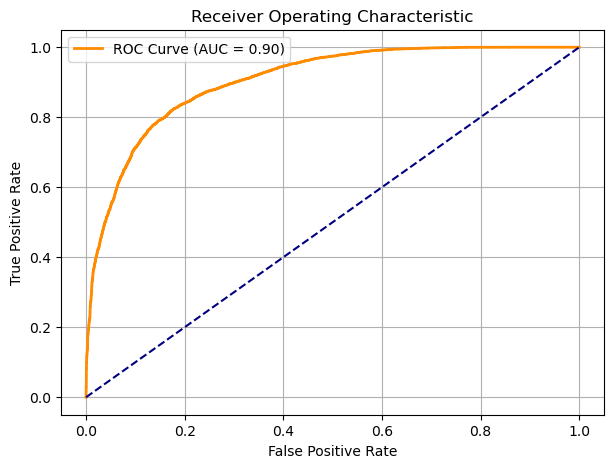

In [143]:
from sklearn.metrics import roc_curve, auc

y_proba = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.grid()
plt.show()


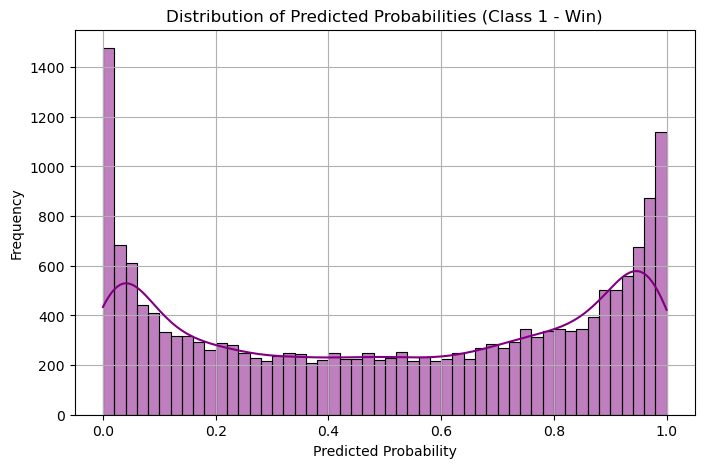

In [145]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(y_proba, bins=50, kde=True, color='purple')
plt.title('Distribution of Predicted Probabilities (Class 1 - Win)')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.grid()
plt.show()



In [149]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Preparing Data
X = final_df.iloc[:, :-1]
y = final_df['result']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=40)

# Column Transformer for encoding categorical features
trf = ColumnTransformer([
    ('categorical', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

# Pipeline with Logistic Regression
pipe = Pipeline([
    ('transform', trf),
    ('model', LogisticRegression(solver='liblinear'))
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)
y


93904     1
53165     1
158414    0
80800     0
112294    1
         ..
47175     0
41105     0
90620     1
37128     0
159694    1
Name: result, Length: 91846, dtype: int64

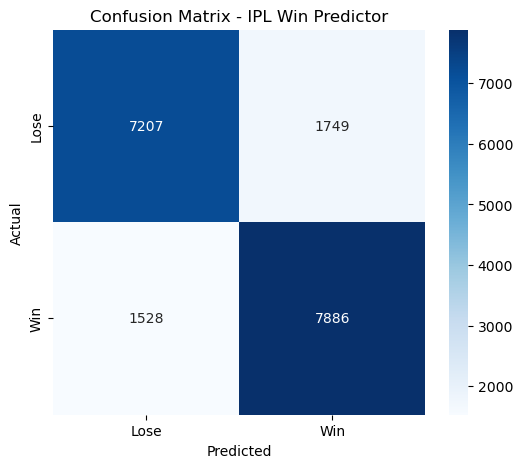

In [153]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Lose', 'Win'], yticklabels=['Lose', 'Win'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - IPL Win Predictor')
plt.show()


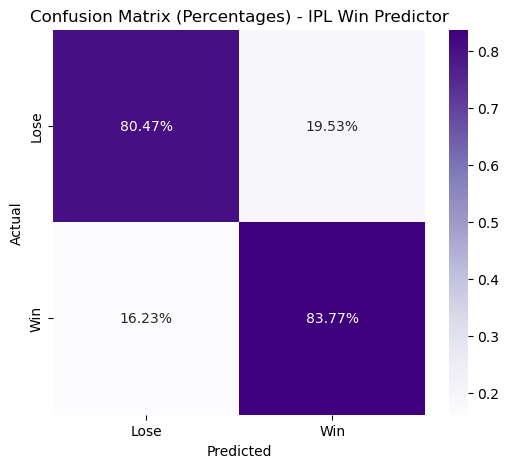

In [155]:
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 5))
sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Purples', xticklabels=['Lose', 'Win'], yticklabels=['Lose', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentages) - IPL Win Predictor')
plt.show()


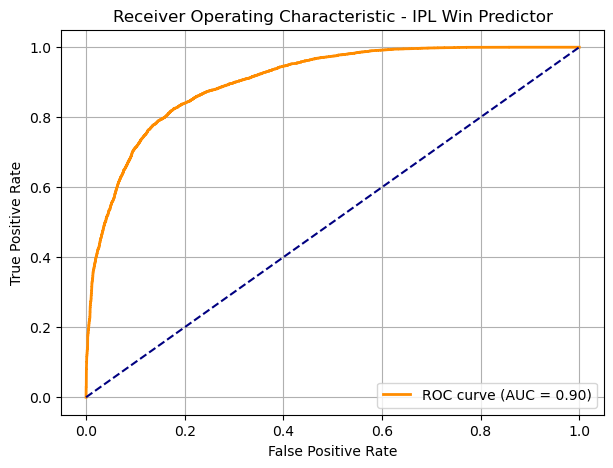

In [157]:
from sklearn.metrics import roc_curve, auc

# Get probabilities
y_prob = pipe.predict_proba(X_test)[:, 1]

# ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting ROC
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - IPL Win Predictor')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [163]:
# Add predictions to X_test for inspection
X_test_copy = X_test.copy()
X_test_copy['actual'] = y_test.values
X_test_copy['predicted'] = y_pred
X_test_copy['prob_win'] = y_prob

# View wrong predictions
wrong_preds = X_test_copy[X_test_copy['actual'] != X_test_copy['predicted']]
print("Wrong Predictions (sample):")
wrong_preds.sample(10)


Wrong Predictions (sample):


,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,actual,predicted,prob_win
116583,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata,174,117,10,181,14.000000,8.923077,1,0,0.460036
51727,Kings XI Punjab,Deccan Chargers,Chandigarh,107,62,7,190,8.586207,10.354839,1,0,0.224977
176224,Sunrisers Hyderabad,Delhi Capitals,Hyderabad,80,64,9,144,6.857143,7.500000,0,1,0.679315
84690,Sunrisers Hyderabad,Mumbai Indians,Mumbai,102,86,8,157,9.705882,7.116279,0,1,0.520870
177945,Punjab Kings,Chennai Super Kings,Chennai,116,71,8,200,10.285714,9.802817,1,0,0.360205
72365,Mumbai Indians,Kings XI Punjab,Mumbai,98,68,7,168,8.076923,8.647059,1,0,0.425260
178405,Gujarat Titans,Delhi Capitals,Ahmedabad,130,117,9,130,0.000000,6.666667,0,1,0.900636
200607,Sunrisers Hyderabad,Punjab Kings,Hyderabad,141,95,8,214,17.520000,8.905263,1,0,0.287471
103665,Kolkata Knight Riders,Mumbai Indians,Kolkata,47,48,5,173,10.500000,5.875000,0,1,0.663576
158741,Mumbai Indians,Punjab Kings,Pune,28,19,5,198,10.099010,8.842105,0,1,0.523066


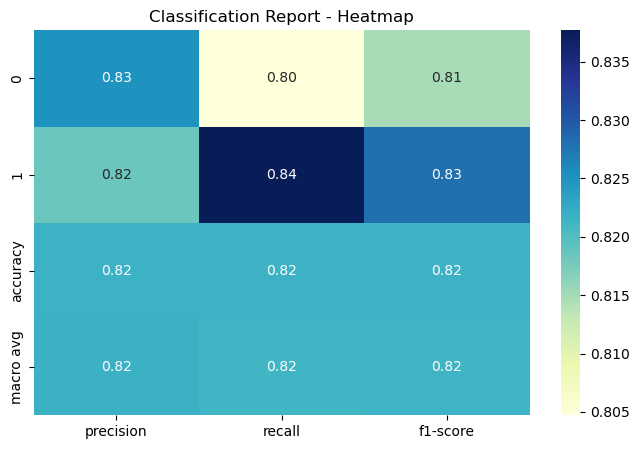

In [167]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate classification report as dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
df_report = pd.DataFrame(report).transpose()

# Plot
plt.figure(figsize=(8, 5))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Classification Report - Heatmap')
plt.show()
